In [1]:
import gdal
import os
from keras.layers import Input
import numpy as np
import argparse
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder  
from keras import backend as K 
from Models import *
from Models.utils import *
#coding=utf-8
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import argparse
import numpy as np 
from keras import *
from keras.models import Sequential  
from keras.layers import *
from keras.utils.np_utils import to_categorical  
from keras.preprocessing.image import img_to_array  
from keras.callbacks import ModelCheckpoint ,TensorBoard
from SegNet0 import *
from SegNet import *
from FCN32 import *
from Models.utils import *
from sklearn.preprocessing import LabelEncoder  
from PIL import Image  
import matplotlib.pyplot as plt  
import cv2
import random
%matplotlib inline
from tqdm import tqdm  
from keras import backend as K 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import time
import gdal
seed = 7  
np.random.seed(seed)  
# data for training  
from keras.applications import vgg16

Using TensorFlow backend.


[INFO] loading network model...
Build enceder done..
Tensor("max_unpooling2d_1/max_unpooling2d_1/Size_1:0", shape=(), dtype=int32) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tensor("max_unpooling2d_2/max_unpooling2d_2/Size_1:0", shape=(), dtype=int32) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tensor("max_unpooling2d_3/max_unpooling2d_3/Size_1:0", shape=(), dtype=int32) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tensor("max_unpooling2d_4/max_unpooling2d_4/Size_1:0", shape=(), dtype=int32) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tensor("max_unpooling2d_5/max_unpooling2d_5/Size_1:0", shape=(), dtype=int32) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
[INFO] model loaded
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 

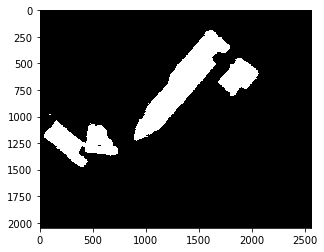

In [2]:
def predict(key,stride=256):
    method = {
              'FCN32':FCN32,
              'SegNet0': SegNet0,
              'SegNet1': SegNet1,
              'SegNet2': SegNet2,
              'SegNet': SegNet}
    key='SegNet'
    # load the trained convolutional neural network
    print("[INFO] loading network model...")
    try:
        model = load_model('D:\Python\seg-data/model/%s_model.h5' % key)
    except:
        model = method[key]() # 有自定义层时，不能直接加载模型
        model.load_weights('D:\Python\seg-data/model/%s_model.h5' % key)
    print('[INFO] model loaded')
    image_size=stride
    TEST_SET=['test.tif']
    predir=r'D:\Python\seg-data\data_MB/'
    for n in range(len(TEST_SET)):
        tif_img = gdal.Open(predir+TEST_SET[n])
        tif_w = tif_img.RasterXSize #栅格矩阵的列数
        tif_h = tif_img.RasterYSize
        tif_data=tif_img.ReadAsArray(0,0,tif_w,tif_h)
        tif_d=tif_data.shape[0]
        tif_data=np.array(tif_data, dtype=float)
        image=cv2.merge(tif_data)
        #print(np.sum(tif_data[0]))
        #plt.imshow(tif_data[0])
        h,w,_ = image.shape
        padding_h = (h//stride + 1) * stride 
        padding_w = (w//stride + 1) * stride
        padding_img = np.zeros((padding_h,padding_w,_))
        padding_img[0:h,0:w,:] = image[:,:,:]
        b1,b2,b3,b4=cv2.split(padding_img) 
        #print(b1/np.max(b1))
        mask_whole = np.zeros((padding_h,padding_w))
        for i in range(padding_h//stride):
            for j in range(padding_w//stride):
                crop = padding_img[i*stride:i*stride+image_size,j*stride:j*stride+image_size,:]
                ch,cw,_ = crop.shape
                print(crop.shape)
                if (ch != 256 or cw != 256):
                    print ('invalid size!')
                    continue
                crop = np.expand_dims(crop, axis=0)
                try:
                    pred = model.predict_classes(crop,verbose=0)
                    pred_prob = model.predict_proba(crop,verbose=1)
                    print ('trying\n')
                except AttributeError as e:
                    #print (crop.shape,np.sum(crop),'\n')
                    pred = model.predict(crop)
                    #print((pred+0.5 ).astype(np.int32))
                    pred=np.argmax(pred,axis=2).astype(np.float) 
                    #print(pred)
                
                pred = pred.reshape((256,256))
                mask_whole[i*stride:i*stride+image_size,j*stride:j*stride+image_size] = pred[:,:]
    plt.imshow(mask_whole,cmap='gray')
predict(key='SegNet',stride=256)